In [1]:

import os 
import tarfile 
from six.moves import urllib 
import pandas as pd
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from google.colab import drive; #importacion de la libreria de google para trabajar en colab

drive.mount('/content/drive')

# https://www.kaggle.com/datasets/doaaalsenani/usa-cers-dataset


Mounted at /content/drive


este dataset es un dataset sobre datos compra venta de coches tiene



1.   precio
2.   marcas 
3.   modelo
4. año 
5. estado
6. kilometros
7. coler 
8. codigo vin coche 
9. estado vendido
10. pais 
11. tiempo en venta



In [2]:
cars= pd.read_csv("/content/drive/MyDrive/Bigdata&IntelixenciaArtificial/Sistemas Big Data/USA_cars_datasets.csv")
cars.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [3]:
cars["country"].unique()

array([' usa', ' canada'], dtype=object)

In [4]:
cars.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    2499 non-null   int64  
 1   price         2499 non-null   int64  
 2   brand         2499 non-null   object 
 3   model         2499 non-null   object 
 4   year          2499 non-null   int64  
 5   title_status  2499 non-null   object 
 6   mileage       2499 non-null   float64
 7   color         2499 non-null   object 
 8   vin           2499 non-null   object 
 9   lot           2499 non-null   int64  
 10  state         2499 non-null   object 
 11  country       2499 non-null   object 
 12  condition     2499 non-null   object 
dtypes: float64(1), int64(4), object(8)
memory usage: 253.9+ KB


In [5]:
cars_data = cars.drop(columns = ['Unnamed: 0'])


datos diferente por columna

In [31]:
cars_data.nunique(axis=0)

price            787
brand             28
model            126
year              26
title_status       2
mileage         2400
color             47
vin             2450
lot             2450
state             43
country            2
condition         47
dtype: int64

tipos de estado 

In [37]:
cars_data["title_status"].unique()

array(['clean vehicle', 'salvage insurance'], dtype=object)

In [33]:
cars_data[cars_data['title_status']=='clean vehicle'].count()

price           2333
brand           2333
model           2333
year            2333
title_status    2333
mileage         2333
color           2333
vin             2333
lot             2333
state           2333
country         2333
condition       2333
dtype: int64

In [34]:
cars_data[cars_data['title_status']=='salvage insurance'].count()

price           120
brand           120
model           120
year            120
title_status    120
mileage         120
color           120
vin             120
lot             120
state           120
country         120
condition       120
dtype: int64

In [6]:
cars_data.describe().T

,count,mean,std,min,25%,50%,75%,max
price,2499.0,1.876767e+04,12116.094936,0.0,10200.0,16900.0,25555.5,84900.0
year,2499.0,2.016714e+03,3.442656,1973.0,2016.0,2018.0,2019.0,2020.0
mileage,2499.0,5.229869e+04,59705.516356,0.0,21466.5,35365.0,63472.5,1017936.0
lot,2499.0,1.676914e+08,203877.210516,159348797.0,167625331.0,167745058.0,167779772.0,167805500.0


In [8]:
# cuenta suma de nulls  por columna
cars_data.isnull().sum().sort_values(ascending=False)

price           0
brand           0
model           0
year            0
title_status    0
mileage         0
color           0
vin             0
lot             0
state           0
country         0
condition       0
dtype: int64

mirar precios = 0

In [9]:
cars_data[cars_data['price']==0].count()

price           43
brand           43
model           43
year            43
title_status    43
mileage         43
color           43
vin             43
lot             43
state           43
country         43
condition       43
dtype: int64

los miramos graficamente

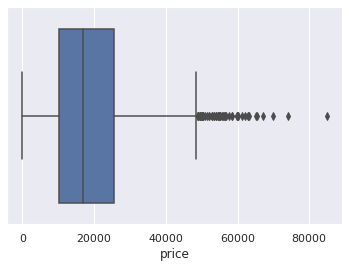

In [10]:
import seaborn as sns
sns.set(color_codes=True)
sns.boxplot(x=cars_data['price'])

In [11]:
# kilometrage erroneos
cars_data[cars_data['mileage']==0].count()

price           6
brand           6
model           6
year            6
title_status    6
mileage         6
color           6
vin             6
lot             6
state           6
country         6
condition       6
dtype: int64

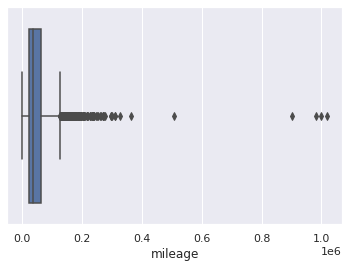

In [12]:
sns.boxplot(x=cars_data['mileage'])

In [13]:
cars_data = cars_data.drop(cars_data[cars_data['price']==0].index)
cars_data = cars_data.drop(cars_data[cars_data['mileage']<=0].index)

In [14]:
# precios erroneos 
cars_data[cars_data['price']==0].count()

price           0
brand           0
model           0
year            0
title_status    0
mileage         0
color           0
vin             0
lot             0
state           0
country         0
condition       0
dtype: int64

In [35]:
# cars_data.to_csv('car_data_not_0.csv',index=False)

limpieza outlier

In [45]:
Q1 = cars_data.quantile(0.25)
Q3 = cars_data.quantile(0.75)
IQR = Q3 - Q1
cars_data = cars_data[~((cars_data < (Q1-1.5 * IQR)) |(cars_data > (Q3 + 1.5 * IQR))).any(axis=1)]
cars_data.shape

price       15200.0
year            3.0
mileage     38854.0
lot        152808.0
dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning:

Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`



(2134, 12)

suma por modelos (Modelos mas vendidos/registrados)

In [15]:
brand_of_car = cars_data.groupby('brand')['model'].count().reset_index().sort_values('model',ascending = False)
brand_of_car = brand_of_car.rename(columns = {'model':'count'})
fig = px.bar(brand_of_car, x='brand', y='count', color='count', labels={
                     "brand": "Marca", "count": "suma"})
fig.show()

In [39]:
brand_of_car = cars_data.groupby('color')['model'].count().reset_index().sort_values('model',ascending = False).head(12)
brand_of_car = brand_of_car.rename(columns = {'model':'count'})
fig = px.bar(brand_of_car, x='color', y='count', color='count', labels={
                     "color": "color", "count": "suma"})
fig.show()


marcas con el coche mas caro vendido

In [17]:
expensive_cars = cars_data.sort_values('price',ascending = False).head(2)
fig = px.bar(expensive_cars, x='brand', y='price', color='price', labels={
                     "brand": "Marca", "price": "precio"})
fig.show()

casi todos los coches registrados son estadounidenses 
la cantidad de cancadienses es despreciable

In [42]:
brand_of_car = cars_data.groupby('country').count().reset_index()
brand_of_car = brand_of_car.rename(columns = {'model':'count'})
fig = px.bar(brand_of_car, x='country', y='count', color='count', labels={
                     "country": "country", "count": "suma"})
fig.show()

Precio por años, se ve como cuanto mas nuevo mas caro

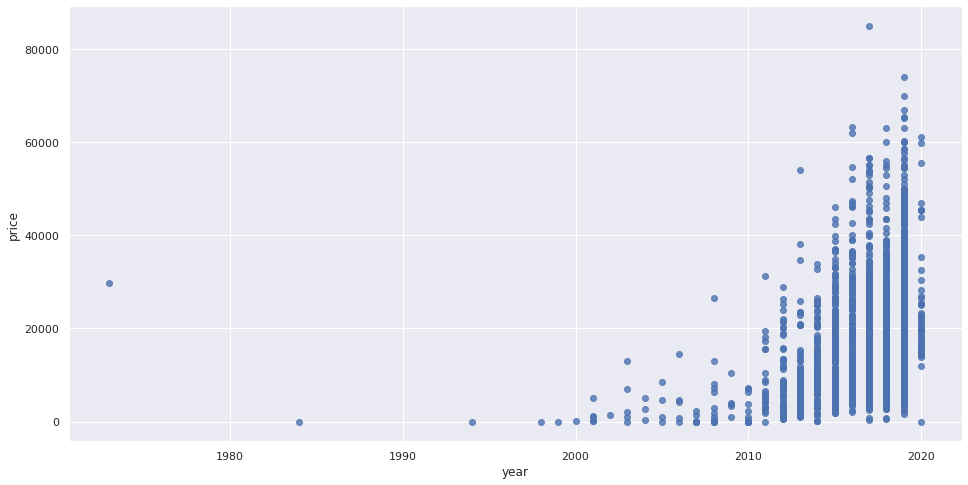

In [18]:
data = cars_data[['price','year']]
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.regplot(x='year', y="price", data=data, fit_reg=False)

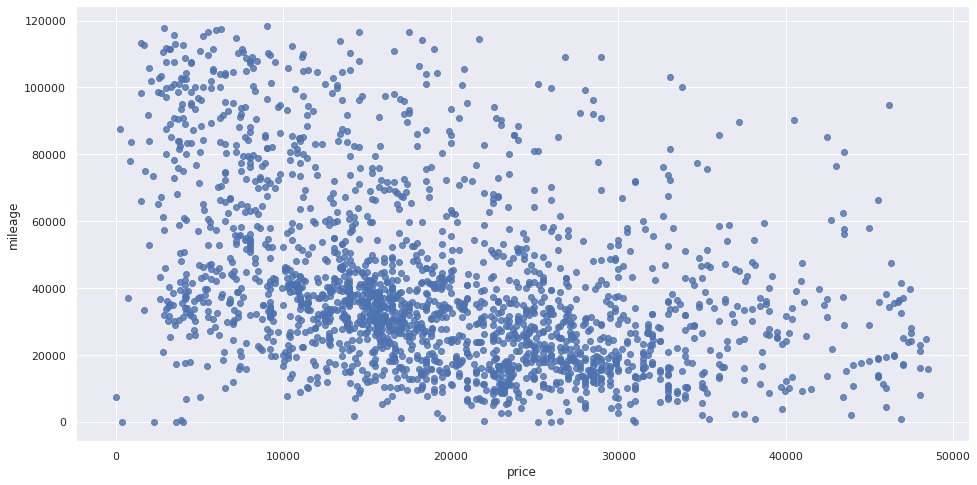

In [46]:
data = cars_data[['price','mileage']]
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.regplot(x='price', y="mileage", data=data, fit_reg=False)

In [20]:
cars_data['mileage'].quantile(0.5)

35065.0

In [21]:
cars_data

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left
...,...,...,...,...,...,...,...,...,...,...,...,...
2494,7800,nissan,versa,2019,clean vehicle,23609.0,red,3n1cn7ap9kl880319,167722715,california,usa,1 days left
2495,9200,nissan,versa,2018,clean vehicle,34553.0,silver,3n1cn7ap5jl884088,167762225,florida,usa,21 hours left
2496,9200,nissan,versa,2018,clean vehicle,31594.0,silver,3n1cn7ap9jl884191,167762226,florida,usa,21 hours left
2497,9200,nissan,versa,2018,clean vehicle,32557.0,black,3n1cn7ap3jl883263,167762227,florida,usa,2 days left


correlacion 3 columans 

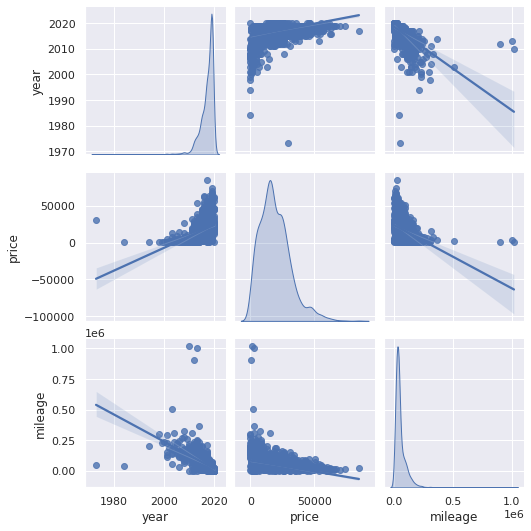

In [22]:
columnas= ['year','price','mileage']
sns.pairplot(cars_data[columnas],  kind="reg", diag_kind = "kde"   )
plt.show()

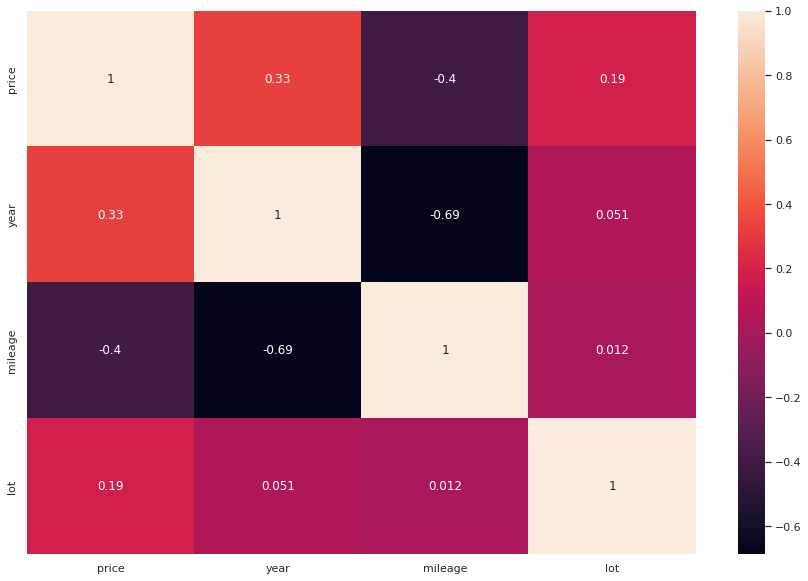

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# taking all rows but only 6 columns
df_small = cars_data.copy()

correlation_mat = df_small.corr()
plt.figure(figsize=(15,10))

sns.heatmap(correlation_mat, annot = True)

plt.show()

paso todas las columnas a numerico y vuelvo a mirar las correlaciones


In [24]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2453 entries, 0 to 2498
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         2453 non-null   int64  
 1   brand         2453 non-null   object 
 2   model         2453 non-null   object 
 3   year          2453 non-null   int64  
 4   title_status  2453 non-null   object 
 5   mileage       2453 non-null   float64
 6   color         2453 non-null   object 
 7   vin           2453 non-null   object 
 8   lot           2453 non-null   int64  
 9   state         2453 non-null   object 
 10  country       2453 non-null   object 
 11  condition     2453 non-null   object 
dtypes: float64(1), int64(3), object(8)
memory usage: 313.7+ KB


In [25]:
cars["country"].unique()

array([' usa', ' canada'], dtype=object)

In [26]:
from sklearn import preprocessing

prepro= preprocessing.LabelEncoder()

coches_copia=cars_data.copy()

columnas_a_tranformar=["brand", "model", "title_status", "color", "state", "country"]

for colum in columnas_a_tranformar:
  prepro.fit(coches_copia[colum])
  coches_copia[colum] = prepro.transform(cars_data[colum])


coches_copia.head()

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,6300,27,25,2008,0,274117.0,2,jtezu11f88k007763,159348797,24,1,10 days left
1,2899,8,92,2011,0,190552.0,37,2fmdk3gc4bbb02217,166951262,35,1,6 days left
2,5350,7,75,2018,0,39590.0,37,3c4pdcgg5jt346413,167655728,7,1,2 days left
3,25000,8,32,2014,0,64146.0,4,1ftfw1et4efc23745,167753855,39,1,22 hours left
4,27700,5,0,2018,0,6654.0,32,3gcpcrec2jg473991,167763266,6,1,22 hours left


una vez pasados los campos a numeros los miramos las correlacion otra vez
asi vemos si hay alguna relacion entre precios y ciudad o entre marca y precio
o marca y ciudad etc

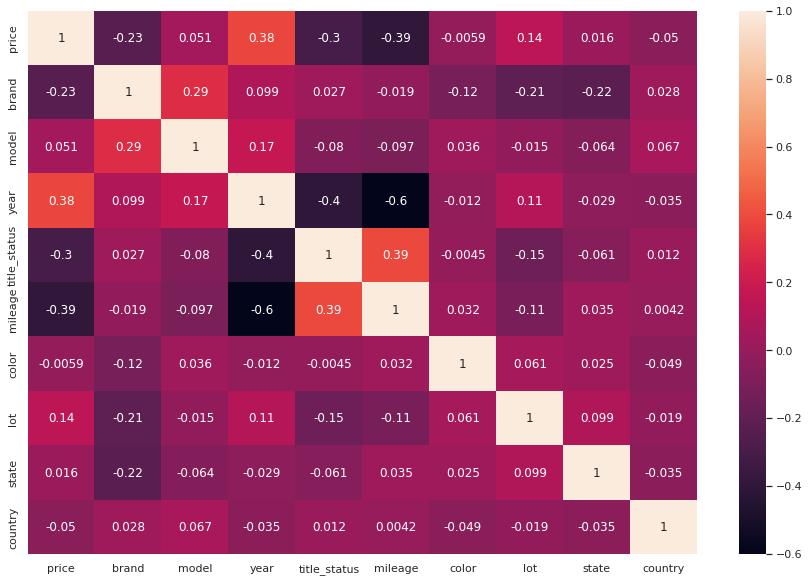

In [49]:
df_small = coches_copia.copy()

correlation_mat = df_small.corr()
plt.figure(figsize=(15,10))

sns.heatmap(correlation_mat, annot = True)

plt.show()

la mejor relacion es entre años y  precio

En conclusion:

Se ve que los preci y el año tiene relacion 

Por otro lado saco en claro que por suerte hay mas coches limpios que sucios
(muy pocos coches sucios 120)

La marca que mas vende con diferencia es ford
pero la que tiene el coche mas caro es mercedes 

Y hay una pequeña relacion entre los coches limpios y sucios y los kilometros 

El precio y los años tienen buena relacion a pesar de eso hay de todo

Hay una infinidad de colores diferentes, pero la absuluta mayoria son blanco negro y gris